# MACDの買いサインから上がる確率を検証
https://qiita.com/MandT500/items/52f253bffb14306611c6
# pandas_datareader -> yfinance


In [1]:
import matplotlib
matplotlib.matplotlib_fname()

import talib as ta
from math import ceil 
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import time,sys,os
import joblib
today = datetime.date.today()

prod = '1y'
dys = 365
dates = '2021-06-27' # 用いるデータの入ったフォルダ

last = today +datetime.timedelta(days=-dys)
last = pd.to_datetime(last)

os.makedirs('./csv/'+str(today),exist_ok = True)
os.makedirs('./fig/'+str(today),exist_ok = True)

import requests

def send_line_notify(notification_message):
    """
    LINEに通知する
    """
    line_notify_token = 'NFuqiryl8uSLNdzCG4B0S0z9qTql7u8LCBP0aQCiJ90'
    line_notify_api = 'https://notify-api.line.me/api/notify'
    headers = {'Authorization': f'Bearer {line_notify_token}'}
    data = {'message': f'message: {notification_message}'}
    requests.post(line_notify_api, headers = headers, data = data)

In [2]:
"""TOPIX リストの読み込み"""
Core30 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_Core30_20210608.csv')
T100 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_100_20210618.csv')
T400 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_400_20210619.csv')
#S500 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_S500_20210618.csv')
S1200 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_S1200_20210620.csv')

S500 = pd.read_csv('../model01_JPX_yfinance/csv/JPX_data/TOPIX_S500_with_info_20210620.csv'\
                       ,).drop('日付',axis=1)

data =pd.DataFrame(S500).copy() 
#data = data.iloc[5:15] # n10

data['code'] = [str(s)+".T" for s in data.code]
stocks = data['code']

#stocks = [str(s)+".T" for s in data.code]
#stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))
stocks

0      1377.T
1      1379.T
2      1417.T
3      1662.T
4      1719.T
        ...  
488    9945.T
489    9946.T
490    9948.T
491    9956.T
492    9997.T
Name: code, Length: 493, dtype: object

# read CSV

In [3]:
closes= pd.read_csv('./csv/'+str(dates)+'/ttl_closes_'\
                    +str(len(stocks))+'_'+str(prod)+'.csv',index_col = 0)

In [4]:
closes

,1377.T,1379.T,1417.T,1662.T,1719.T,1720.T,1766.T,1786.T,1813.T,1815.T,...,9882.T,9889.T,9928.T,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-29,3403.442871,1983.212646,1559.128418,1740.585693,582.200073,547.089722,6865.095215,NaN,1366.706299,1984.041626,...,1453.665405,1441.996948,2241.946533,2294.779541,5901.297852,1768.581421,1489.880127,2109.508545,2037.158081,605.248901
2020-06-30,3408.397217,1974.458862,1571.836182,1760.055420,600.514404,549.057678,6874.875000,NaN,1380.315063,1985.966064,...,1442.004883,1445.875854,2220.332520,2316.965088,5901.297852,1764.644775,1489.880127,2124.212158,2062.671631,597.362915
2020-07-01,3284.545410,1942.361694,1544.465820,1752.267456,596.658752,536.265991,6796.640137,NaN,1375.454834,1933.045410,...,1408.967041,1391.570557,2191.841553,2279.345947,5724.259277,1725.277344,1444.493042,2095.784668,2037.158081,600.320129
2020-07-02,3254.821045,1934.580566,1521.983154,1771.737183,597.622620,537.250000,6845.536621,NaN,1360.874023,1929.196655,...,1396.334961,1373.145630,2171.210205,2317.929688,5802.942871,1723.308960,1402.066040,2115.389893,2065.615479,620.035034
2020-07-03,3225.096680,1925.826904,1532.735718,1781.471924,591.839233,526.426270,6747.743164,NaN,1375.454834,1926.310059,...,1448.806885,1386.721924,2166.297852,2327.575684,5743.930176,1720.356445,1403.052734,2203.612793,2053.840088,638.764282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,3755.000000,1918.000000,1941.000000,1995.000000,827.000000,781.000000,10240.000000,283.0,1856.000000,1873.000000,...,1934.000000,1432.000000,1599.000000,2586.000000,5650.000000,2038.000000,1416.000000,2474.000000,2295.000000,962.000000
2021-06-23,3750.000000,1914.000000,1913.000000,1995.000000,811.000000,781.000000,10080.000000,282.0,1836.000000,1854.000000,...,1934.000000,1432.000000,1599.000000,2586.000000,5650.000000,2038.000000,1416.000000,2474.000000,2295.000000,962.000000
2021-06-24,3735.000000,1924.000000,1910.000000,2042.000000,812.000000,773.000000,10090.000000,282.0,1844.000000,1855.000000,...,1934.000000,1432.000000,1599.000000,2586.000000,5650.000000,2038.000000,1416.000000,2474.000000,2295.000000,962.000000


C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


   buy_sign_count  roc_d1_plus  roc_d3_plus  roc_d5_plus  roc_d10_plus
0               3            3            2            2             2


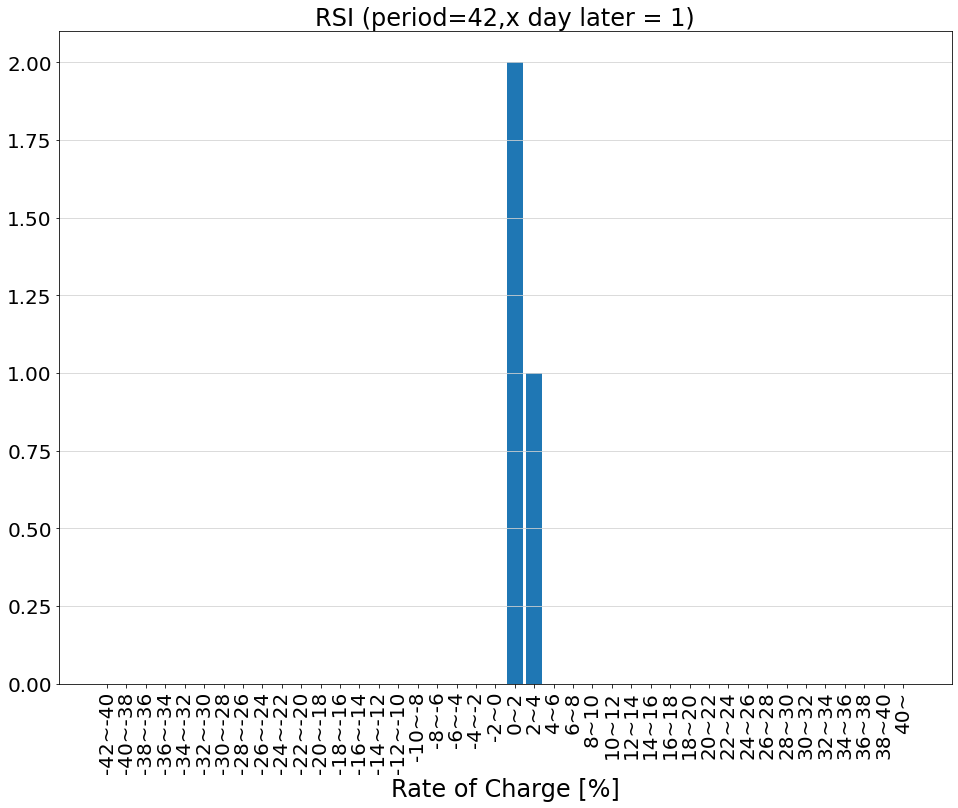

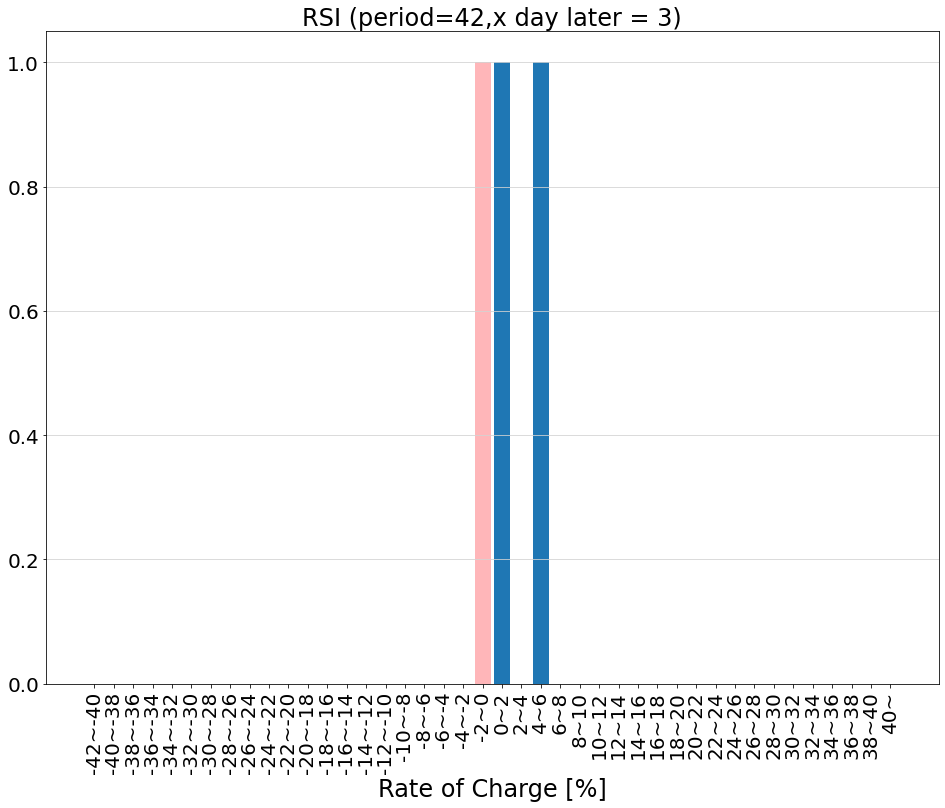

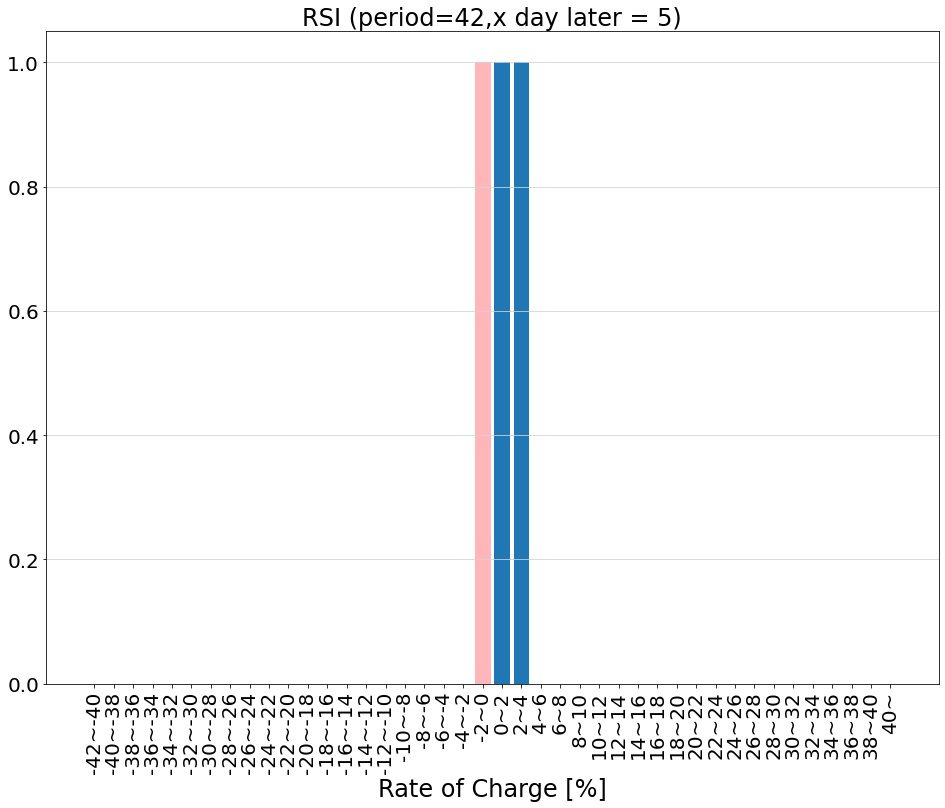

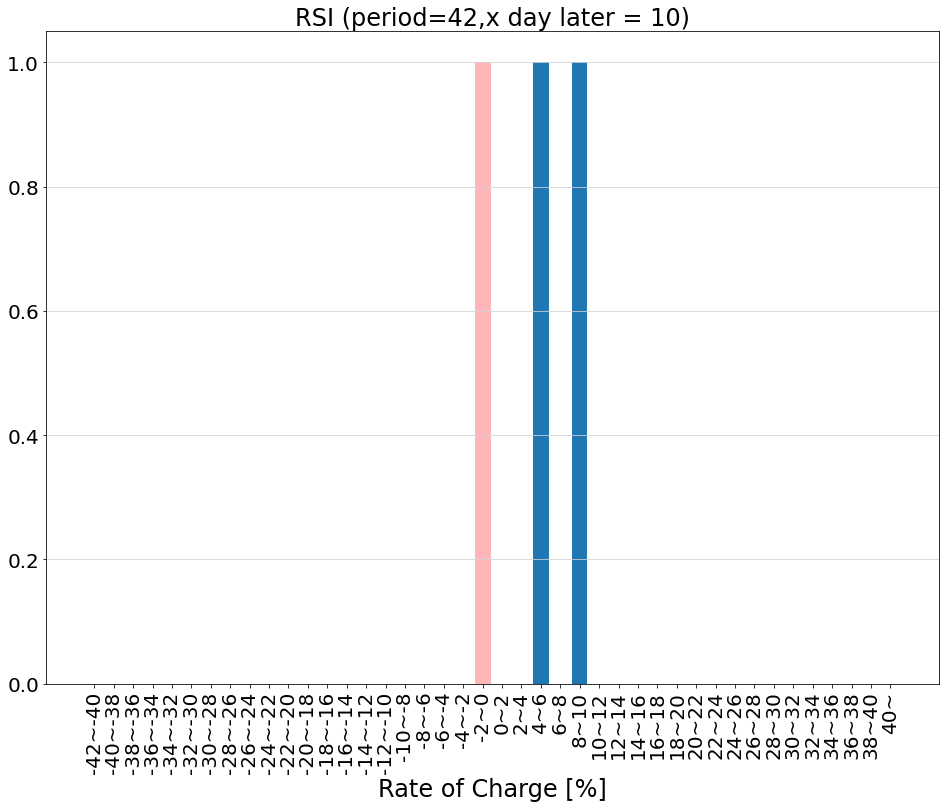

In [51]:
df = closes.copy()
# result data frame 作成
day = [1,3,5,10] # 株価を確認する日（〇日後の株価）
col = ['buy_sign_count']
period = [42] # [9,14,22,42] # RSIの設定期間

for d in day:
    col.append('roc_d'+str(d)+'_plus')
result = pd.DataFrame(data=0,index=range(len(period)),columns=col)
# rocマップのデータフレーム
col=[]
for p in period:
    for d in day:
        col.append('roc_p'+str(p)+'_d'+str(d))

index=[]
# 分布図の設定(-40~40%を2%間隔)
for i in range(-42,42,2):
    if(i==40):
        index.append(str(i)+'~')
    elif(i==42):
        index.append('~'+str(i+2))
    else:
        index.append(str(i)+'~'+str(i+2))
roc_map = pd.DataFrame(data=0,index=index,columns=col)
pickup = []

for c,e in enumerate(df.columns):
    for d in day:
        df[str(e)+'_roc_d'+str(d)] =np.nan
    for p in range(len(period)):    
        #RSI https://qiita.com/MandT500/items/37c2d357e89ca6354d13
        df[str(e)+'_rsi'] = ta.RSI(df[e],timeperiod =period[p])
        df[str(e)+'buy_sign'] = False
    
        # タイミング取得
        point = 30
        for i in range(len(df.index)-1):
            '''#下回ったとき
            if(df[str(e)+'_rsi'][i]>point and df[str(e)+'_rsi'][i+1]<=point):
                df[str(e)+'buy_sign'].iat[i+1] = True
            '''
            #RSI
            if(df[str(e)+'_rsi'][i] < point and df[str(e)+'_rsi'][i+1] >=point):
                df[str(e)+'buy_sign'].iat[i+1] = True
                sign = df[str(e)+'buy_sign'].index[i]
                pickup.append([sign,str(e)])

        for bs in df.index[df[str(e)+'buy_sign']]:
            for d in day:
                if(len(df[str(e)][:bs])+d <= len(df[str(e)])):
                    df[str(e)+'_roc_d'+str(d)].at[bs]= (df[str(e)][len(df[str(e)][:bs])+d-1]\
                                            - df[str(e)][bs])/df[str(e)][bs] * 100
                else:
                    # 〇日後の株価がない場合は最新の株価
                    df[str(e)+'_roc_d'+str(d)].at[bs] = (df[str(e)][-1]\
                                            - df[str(e)][bs])/df[str(e)][bs] * 100
            
                #分布に振り分け
                roc_index = 20+ceil(df[str(e)+'_roc_d'+str(d)].at[bs]/2)
                if(roc_index<0):
                    roc_index=0
                elif(roc_index>41):
                    roc_index=41
                roc_map.at[index[roc_index],'roc_p'+str(period[p])+'_d'+str(d)] +=1
    
#上昇した数をカウント/Roc分布を画像出力
for p in range(len(period)):
    result['buy_sign_count'].iat[p] = sum(roc_map.iloc[:,p*len(day)])
    for d in range(len(day)):
        result['roc_d'+str(day[d])+'_plus'].iat[p] = sum(roc_map.iloc[21:,p*len(day)+d])
        
        #roc分布を画像出力
        fig = plt.figure(figsize=(16,12))
        ax= fig.add_subplot(111)
        bar_list = ax.bar(roc_map.index,roc_map['roc_p'+str(period[p])+'_d'+str(day[d])])
        [bar_list[i].set_color('#ffb6b9') for i in range(21)]
        ax.set_xticklabels(roc_map.index,rotation=90)
        ax.tick_params(labelsize=20)
        ax.grid(axis='y',c='lightgray')
        title = 'RSI (period='+str(period[p])+',x day later = ' +str(day[d])+')'
        ax.set_title(title,fontsize=24)
        ax.set_xlabel('Rate of Charge [%]',fontsize=24)
        fig.savefig('./fig/'+str(today)+'/'+title+'.png',bbox_inches='tight')
print(result)

In [72]:
_code =data.copy().set_index('code')
_pickup =pd.DataFrame(pickup)
report = pd.merge(_pickup,_code,left_on=1,right_index=True)
report

,0,1,name,market,33class,33class_name,17class,17class_name,size,category
0,2020-09-02,4025.T,多木化学,市場第一部（内国株）,3200,化学,4,素材・化学,6,TOPIX Small 1
1,2021-05-11,4574.T,大幸薬品,市場第一部（内国株）,3250,医薬品,5,医薬品,6,TOPIX Small 1
2,2020-12-09,9511.T,沖縄電力,市場第一部（内国株）,4050,電気・ガス業,11,電力・ガス,6,TOPIX Small 1


In [85]:
report = pd.DataFrame()

In [86]:
print('該当件数は {} 件です。'.format(report.shape[0]))
for i in range(len(report)):
    print('Date:{}, code:{}, name{},当時の株価:{} です。現在は{}'.format(
        report.iloc[i,0],report.iloc[i,1],report.iloc[i,2],
        closes.at[report.iloc[i,0],report.iloc[i,1]],
        closes.at[report.iloc[-1,0],report.iloc[i,1]]))

該当件数は 0 件です。


In [10]:
'''df.to_csv('./csv/'+str(today)+'/g_point_deg60_n'\
                    +str(len(stocks))+'_'+str(prod)+'_RSI.csv')
'''